In [2]:
import pandas as pd
import numpy as np

# Ler dados do arquivo CSV para um DataFrame pandas
file_path = 'C:/Users/karin/OneDrive/Área de Trabalho/data science/titanic/train.csv'
df_titanic = pd.read_csv(file_path)

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analisar modelos

### Importar das bibliotecas

In [5]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Dividir dataset
from sklearn.model_selection import train_test_split, GridSearchCV

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer


# Avaliação de resultados
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings

warnings.filterwarnings('ignore')


## Ingestão de Dados

In [6]:
# Ler dados do arquivo CSV para um DataFrame pandas
# Carregar o dataset Titanic
file_path = 'C:/Users/karin/OneDrive/Área de Trabalho/data science/titanic/train.csv'
dados  = pd.read_csv(file_path)

# Renomear as colunas para português
dados.rename(columns={
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'SibSp': 'IrmaosConjuges',
    'Parch': 'PaisFilhos',
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine',
    'Embarked': 'Embarque'
}, inplace=True)

# Visualizar as primeiras linhas
dados.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuges,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tratamento e Pré-processamento

In [7]:
# Remover colunas irrelevantes
dados.drop(['IdPassageiro', 'Nome', 'Bilhete', 'Cabine'], axis=1, inplace=True)

# Preencher valores nulos em 'Idade'
imputador = SimpleImputer(strategy='median')
dados['Idade'] = imputador.fit_transform(dados[['Idade']])

# Preencher valores faltantes em 'Embarque'
dados['Embarque'].fillna(dados['Embarque'].mode()[0], inplace=True)

# Codificação de variáveis categóricas
encoder = LabelEncoder()
dados['Sexo'] = encoder.fit_transform(dados['Sexo'])
dados['Embarque'] = encoder.fit_transform(dados['Embarque'])

# Escalonamento de features
escalonador = StandardScaler()
caracteristicas = ['Idade', 'Tarifa', 'IrmaosConjuges', 'PaisFilhos']
dados[caracteristicas] = escalonador.fit_transform(dados[caracteristicas])

dados.head()

,Sobreviveu,Classe,Sexo,Idade,IrmaosConjuges,PaisFilhos,Tarifa,Embarque
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,2
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,0
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,2
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,2
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,2


## Divisão dos Dados (Data Splitting)
Dividimos os dados em dois grupos:

Dados de Treinamento: Usados para ensinar o modelo a identificar padrões.
Dados de Teste: Usados para verificar se o modelo aprendeu bem e faz previsões corretas em situações novas.
Essa divisão é importante para garantir que o modelo não apenas memorize os exemplos, mas realmente aprenda a generalizar para dados que nunca viu antes. Assim, asseguramos que ele funcionará bem no mundo real.

In [8]:
# Separar features e target
X = dados.drop('Sobreviveu', axis=1)
y = dados['Sobreviveu']

# Dividir em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Teste de Vários Modelos
Lista de Modelos a Serem Testados:

Regressão Logística

Árvore de Decisão

Random Forest

Máquina de Vetores de Suporte (SVM)

Gradient Boosting

In [10]:
# Dicionário para armazenar os resultados
modelos = {
    'Regressão Logística': LogisticRegression(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Lista para armazenar os resultados
resultados = []

# Avaliação de cada modelo
for nome_modelo, modelo in modelos.items():
    # Treinar o modelo
    modelo.fit(X_treino, y_treino)
    # Previsões
    y_pred = modelo.predict(X_teste)
    # Acurácia
    acuracia = accuracy_score(y_teste, y_pred)
    resultados.append({'Modelo': nome_modelo, 'Acurácia': acuracia})

## Cálculo Simplificado do Accuracy Score (Acurácia)

O accuracy_score mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. É calculado assim:

Acurácia = (Número de Previsões Corretas) ÷ (Número Total de Previsões)
Exemplo:

Se o modelo fez 100 previsões e acertou 85 delas:

Acurácia = 85 ÷ 100 = 0,85 ou 85%
Resumo:

O accuracy_score indica a porcentagem de acertos do modelo.
Quanto mais próximo de 100%, melhor o desempenho em prever corretamente.

In [11]:
# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='Acurácia', ascending=False)
df_resultados.head()

,Modelo,Acurácia
1,Árvore de Decisão,0.832402
3,SVM,0.821229
2,Random Forest,0.810056
0,Regressão Logística,0.804469
4,Gradient Boosting,0.798883


In [12]:
# Avaliação detalhada do Random Forest
rf = RandomForestClassifier()
rf.fit(X_treino, y_treino)
y_pred = rf.predict(X_teste)

## Matriz de Confusão

A matriz de confusão é uma tabela que resume o desempenho de um modelo de classificação, comparando as previsões feitas pelo modelo com os valores reais. Ela mostra:

- Verdadeiros Positivos (VP): Quantidade de vezes que o modelo previu corretamente a classe positiva.
- Falsos Positivos (FP): Quando o modelo previu a classe positiva, mas o valor real era negativo.
- Falsos Negativos (FN): Quando o modelo previu a classe negativa, mas o valor real era positivo.
- Verdadeiros Negativos (VN): Quantidade de vezes que o modelo previu corretamente a classe negativa.

A matriz permite identificar onde o modelo está acertando e errando, ajudando a entender melhor seu desempenho e a ajustar melhorias.

Matriz de Confusão:


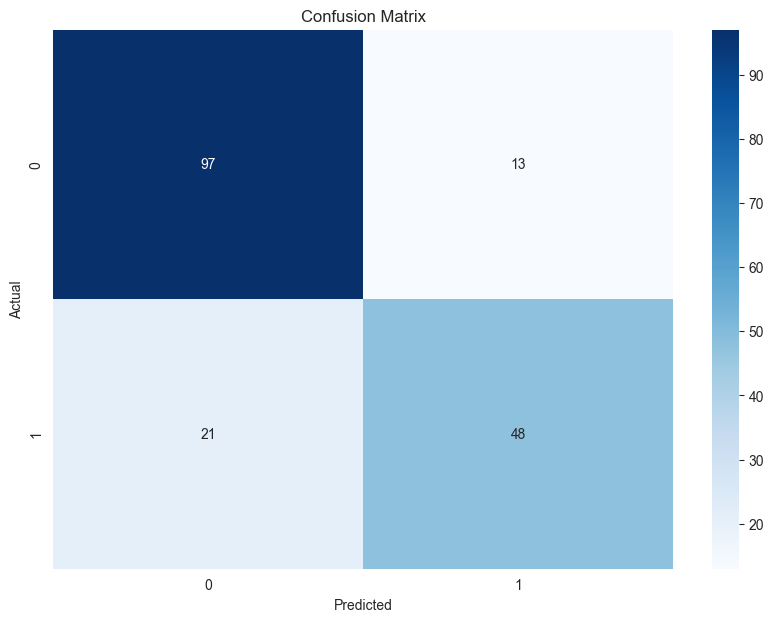

In [13]:
print('Matriz de Confusão:')
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_teste, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print('Relatório de Classificação:')
report = classification_report(y_teste, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.head()

Relatório de Classificação:


,precision,recall,f1-score,support
0,0.822034,0.881818,0.850877,110.000000
1,0.786885,0.695652,0.738462,69.000000
accuracy,0.810056,0.810056,0.810056,0.810056
macro avg,0.804460,0.788735,0.794669,179.000000
weighted avg,0.808485,0.810056,0.807544,179.000000
